## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.metrics import r2_score

In [2]:
plt.style.use(['ggplot'])

# Dataset (MV)

In [4]:
data = pd.read_csv('AFLW2000_CSV_Original.csv', sep = ',')

In [5]:
data

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,121.868034,122.367607,126.819237,130.831787,137.523132,148.521729,161.528015,182.876678,213.940063,248.005371,...,310.149048,313.233856,315.107117,322.384613,330.965576,330.701965,324.903870,-0.399231,0.018227,0.085676
1,281.238159,277.339417,274.876953,269.523773,257.788269,240.968155,221.801483,205.846298,207.085449,226.185638,...,303.093811,300.724457,300.060974,303.260895,299.485168,300.598602,302.286499,0.470065,1.189533,0.300959
2,236.385101,239.198257,242.566376,243.971375,242.828186,238.567902,232.561859,229.155289,238.303162,259.122467,...,303.122009,302.877289,302.146454,300.489380,303.481873,304.681732,304.631042,-0.184650,0.881137,-0.236852
3,168.029221,177.697510,190.641602,201.395294,211.957214,222.723099,231.350220,244.332855,268.327637,291.832214,...,315.469391,312.701294,310.133301,300.041290,315.544800,319.498596,320.843994,-0.175379,0.299208,-0.373374
4,280.462250,287.249817,293.892456,297.539368,295.677002,287.270355,271.661591,254.701157,250.219299,261.212463,...,306.811768,307.014893,305.351318,309.934814,311.558899,312.920746,312.058350,-0.882169,1.198004,-1.033374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,112.578934,113.787857,119.259262,125.335999,133.637939,146.153839,162.205170,183.907257,213.987427,243.809875,...,317.068970,317.718140,319.277924,321.063141,324.635498,324.518494,322.085815,-0.197102,-0.070430,0.105118
1996,111.117966,113.647079,115.328712,120.565918,134.109467,158.448425,187.568314,212.202332,223.977646,218.683380,...,316.934998,316.013428,315.392395,316.949585,316.981415,317.922302,318.168457,-0.232617,-1.418751,0.175960
1997,308.227417,309.905334,311.432251,310.488586,303.662415,288.275238,268.575409,248.855255,239.939240,248.186981,...,311.084686,311.580597,311.960449,316.873444,314.677002,315.051239,313.333374,-1.447955,1.431267,-1.509418
1998,106.611572,106.089981,107.328842,109.023941,116.216049,136.338547,162.523712,190.193268,208.983047,210.192596,...,309.402283,310.208862,310.287506,312.933044,313.265747,313.581848,312.269653,-0.420465,-1.191176,0.451515


In [6]:
y_shift = 68
xy_list = ["8", "30", "36", "45", "48", "54", str(8 + y_shift), str(30+ y_shift), str(36+ y_shift), str(45+ y_shift), str(48+ y_shift), str(54+ y_shift)]

In [7]:
X = data[xy_list]
X

,8,30,36,45,48,54,76,98,104,113,116,122
0,213.940063,225.088425,162.579117,301.851685,180.507431,261.812347,375.730499,281.803406,199.647583,212.364670,305.174622,322.659698
1,207.085449,186.151962,219.600342,256.144623,206.686462,226.800659,345.316071,262.358002,239.387238,224.261322,311.824158,303.561066
2,238.303162,196.313782,198.901047,254.840668,212.726471,252.738708,351.412842,273.822266,239.487122,231.438049,304.789856,300.910248
3,268.327637,216.827087,166.383850,268.555054,213.172653,269.946014,362.018036,282.946289,244.075317,208.186081,316.072205,299.294373
4,250.219299,173.975540,200.708405,216.878983,223.819580,229.980194,356.444702,282.408569,243.682465,227.281342,312.089142,310.606750
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,213.987427,231.108200,163.308197,297.862183,186.035110,251.346939,372.599121,279.537415,206.959961,218.591782,315.108887,321.491089
1996,223.977646,271.463501,207.591187,224.472351,225.867645,231.436157,374.818481,276.808716,232.862717,226.686249,322.267975,317.133240
1997,239.939240,179.231552,216.805939,218.558716,228.697906,221.335007,377.363190,274.731262,231.459717,226.749115,312.436340,317.766571
1998,208.983047,282.930267,209.662598,248.470062,207.040680,234.653503,374.496033,265.670654,209.398865,215.537491,310.097931,313.753479


In [8]:
X = data.iloc[:,0:136].to_numpy()

In [9]:
#pitch, yaw, roll
p = data[["136"]].to_numpy()
y = data[["137"]].to_numpy()
r = data[["138"]].to_numpy()

In [10]:
X.shape

(2000, 136)

In [11]:
X.shape[0]

2000

In [12]:
X.shape[1]

136

## Cost Function

In [13]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = X.shape[0]
    # print("m: ",m)
    
    
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions-y))
    return cost

## 1. Batch/Vanilla GD (MV)

In [14]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100,epsilon = 10e-8,beta1 = 0.9,beta2=0.9):
    '''
    X    = X matrix with concatinated bias column of (1s) --> which is multiplied by (theta_0)
    y    = Vector of Y
    theta=Vector of thetas np.zeros((n,1))
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    
    # m = len(y)
    m = X.shape[0]
    n = X.shape[1]
    # print(X.shape)     # --> (13, 2)
    # print(theta.shape) # --> (2, 1)
    
    hyothesis_history = np.zeros((iterations, m))
    gradient_history = np.zeros((iterations, n))
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,n))
    cost = 0.0
    # Momentum
    V = np.zeros((n,1))
    M = np.zeros((n,1))
    M_cap, V_cap = np.zeros((n,1)), np.zeros((n,1))
    for it in range(iterations):
        theta_history[it,:] =theta.T             # --> (1, 2)
        prediction = np.dot(X,theta)                           # --> (13, 1) 
        hyothesis_history[it,:] =prediction.T 
        
        cost = cal_cost(theta,X,y).T
        cost_history[it]  = cost
        
        
        gradient = (1/m)*(X.T.dot((prediction - y)))  # --> (2, 1)
        gradient_history[it, :] = gradient.T 
        
        # Stopping Condition
        if(np.abs(np.subtract(gradient_history[it], gradient_history[it-1])) < 0.001).all() and (it > 2):
            print("Grdaient Stopping Condition..")
            break
        
        # Adam
        M = beta1*M + (1-beta1)*gradient
        V = beta2*V + (1 - beta2)*np.square(gradient)
        
        #Bias Correction
        M_cap = M/(1-beta1**(it+1))
        V_cap = V/(1-beta2**(it+1))
        
        theta = theta - (learning_rate*M_cap)/(np.sqrt(V_cap) + epsilon)
        
        
        # Stopping Condition
        # if (np.abs(np.subtract(theta_history[it], theta_history[it-1])) < 0.001).all() and (it > 2):
        #     print("Theta Stopping Condition..")
        #     break
        
        if (np.abs(np.subtract(cost_history[it], cost_history[it-1])) < 0.001).all() and (it > 2):
            print("Cost Stopping Condition..")
            break
        print(it)
           
    return theta, cost_history, theta_history, hyothesis_history

## Hyperparameter Tuning

In [15]:
'''
lr     = learning rate (hyperparamater)
n_iter = number of iterations
'''
# 72
# lr =0.00145 #0.01
# n_iter = 1000
# epsilon = 10e-8
# beta1 = 0.5
# beta2 = 0.7

lr =0.0011 #0.01
n_iter = 1000
epsilon = 10e-8
beta1 = 0.8
beta2 = 0.9

## All Features

#### 83 % Logical behaviour

In [117]:
lr =0.001 #0.01
n_iter = 1000
epsilon = 10e-8
beta1 = 0.9
beta2 = 0.99

In [118]:
'''
m      = number of obseravations/records
n      = number of features + bias(theta_0)
X_b    = X matrix with concatinated bias column of (1s) --> which is multiplied by (theta_0)

'''
#theta = np.random.randn(2,1)

m = X.shape[0]

n = X.shape[1] + 1 

# theta initialization with zeros of size n*1
theta = np.zeros((n,1))        # --> (2, 1)

# Concatinate the b (column of 1s) on X to be multiplied by theta_0
X_b = np.c_[np.ones((m,1)),X]
# print(X_b)
theta,cost_history,theta_history,hyothesis_history = gradient_descent(X_b,y,theta,lr,n_iter,epsilon,beta1,beta2)

for i in range(0, n):
    print('Theta{}:          {:0.3f},'.format(i, theta[i][0]))

# print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

#theta_history for plotting 
theta0 = theta_history[:,0]
theta1 = theta_history[:,1]
theta2 = theta_history[:,2]
theta3 = theta_history[:,3]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
Cost Stopping Condition..
Theta0:          0.000,
Theta1:          0.000,
Theta2:          0.000,
Theta3:          0.000,
Theta4:          0.000,
Theta5:          0.000,
Theta6:          0.000,
Theta7:          0.001,
Theta8:          0.001,
Theta9:          0.001,
Theta10:          0.001,
Theta11:          0.000,
Theta12:          0.000,
Theta13:          0.000,
Theta14:          0.000,
Theta15:          0.000,
Theta16:          0.000,
Theta17:          0.000,
Theta18:          0.000,
Theta19:          0.000,
Theta20:          -0.002,
Theta21:          -0.002,
Theta22:          -0.002,
Theta23:          -0.002,
Theta24:          -0.002,


In [119]:
y_pred = np.dot(X_b, theta)
y_pred

array([[-0.82856809],
       [ 0.17674623],
       [-0.33295602],
       ...,
       [-0.30673268],
       [ 0.16572672],
       [-0.58360648]])

## R2 score

In [120]:
r2score = r2_score(y, y_pred, sample_weight=None, multioutput='uniform_average')
r2score

0.8339209554231832

## Plotting

#### Plot loss vs. epochs

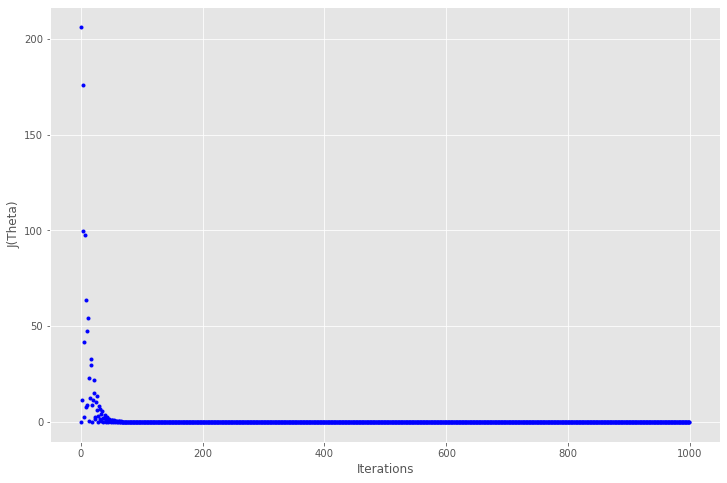

In [121]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
# _=ax.plot(range(n_iter),cost_history,'b.')
_=ax.plot(cost_history,'b.')

#### Plot Theta_0 vs. loss

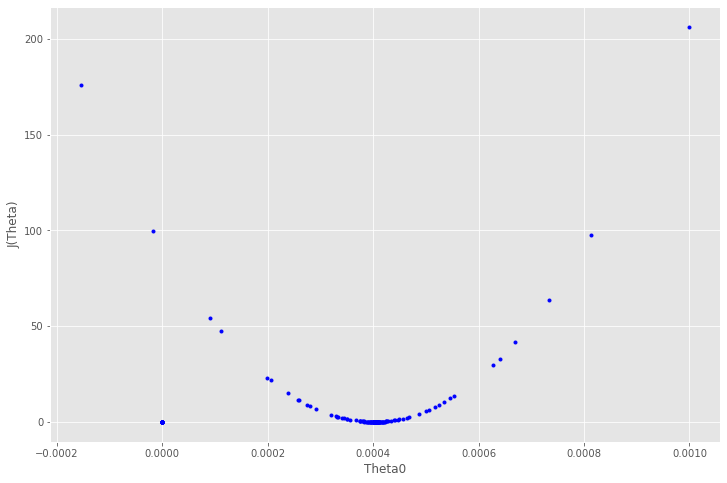

In [122]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta0')
_=ax.plot(theta0,cost_history,'b.')

#### Plot Theta_1 vs. loss

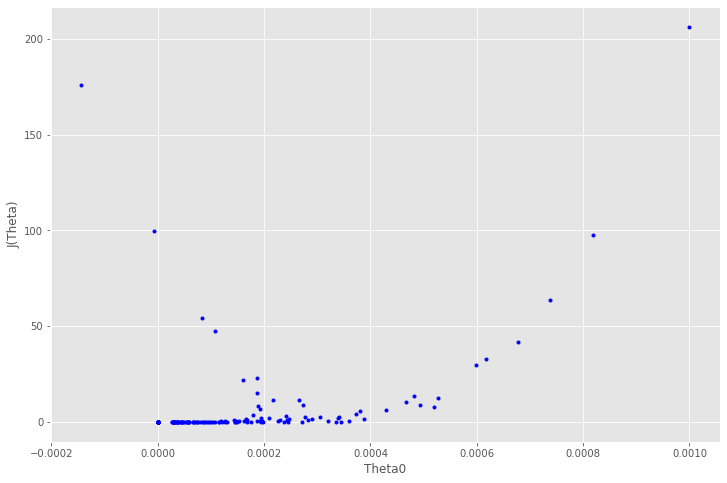

In [22]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta0')
_=ax.plot(theta1,cost_history,'b.')

#### Plot Theta_2 vs. loss

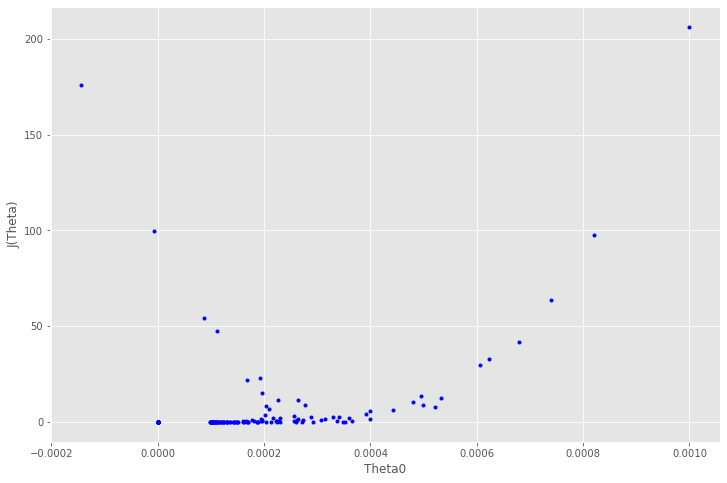

In [23]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta0')
_=ax.plot(theta2,cost_history,'b.')

#### Plot Theta_3 vs. loss

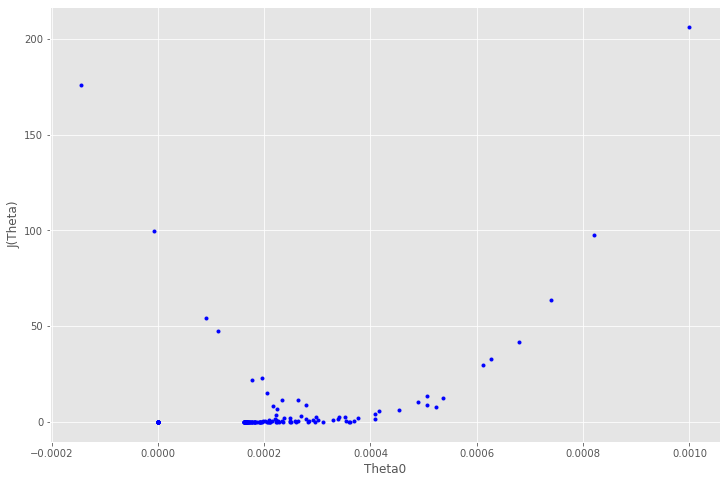

In [24]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta0')
_=ax.plot(theta3,cost_history,'b.')

## 2. Mini-Batch Adam (MV)

In [64]:
#Shuffle
indices = np.random.permutation(m)
X = X[indices]
y = y[indices]
#Shuffle

def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =15, epsilon = 10e-8,beta1=0.5,beta2=0.7):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    
    m = X.shape[0]
    #print("m: ",m)
    n = X.shape[1] + 1
    # print(n)
    
    # n_batches = math.ceil(m/batch_size)
    n_batches = int(m/batch_size)
    cost_history_by_batch = np.zeros(iterations*n_batches)
    theta_history_by_batch = np.zeros((iterations*n_batches,n))
    by_batch_count = 0
    
    
    
    hyothesis_history = np.zeros((iterations, m))
    gradient_history = np.zeros((iterations, n))
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,n))

#     print("hyothesis_history: " ,hyothesis_history.shape)
#     print("cost_history: " ,cost_history.shape)
#     print("theta_history: " ,theta_history.shape)
    
    
    cost = 0.0
    # Momentum
    V = np.zeros((n,1))
    M = np.zeros((n,1))
    M_cap, V_cap = np.zeros((n,1)), np.zeros((n,1))
    
    for it in range(0, iterations):
        
        hypothesis_list = np.array([])
        theta_history[it,:] =theta.T
        
        sizer = 0
        counter = n_batches
        for i in range(0,m,batch_size):
            # print(i)
            # print("batch: ", batch_size)
            #print(counter)
            if(counter == 0):
                break
            theta_history_by_batch[by_batch_count, :] = theta.T

            # print("i: ", i)
            sizer = m-(i+batch_size)
            # print("sizer: ", sizer)
            if(sizer > batch_size):
                X_i = X[i:i+batch_size]
                X_i = np.c_[np.ones(len(X_i)),X_i]
                y_i = y[i:i+batch_size]
            if(sizer < batch_size and sizer > 0):
                X_i = X[i:m]
                X_i = np.c_[np.ones(len(X_i)),X_i]
                y_i = y[i:m]              
            #print("X_i length: ", len(X_i))
            #X_i = np.c_[np.ones(len(X_i)),X_i]
            #print(X_i)

            prediction = np.dot(X_i,theta)
            # print("prediction", prediction.shape)
            hypothesis_list = np.append(hypothesis_list, prediction) 
#             print("hypothesis_list: ", hypothesis_list)
#             print("hypothesis_list size: ", len(hypothesis_list))

            cost = cal_cost(theta,X_i,y_i).T
            cost_history_by_batch[by_batch_count] = cost
            #print("cost: ", cost)
            # counter ++
            by_batch_count = by_batch_count + 1

            gradient = (1/batch_size)*(X_i.T.dot((prediction - y_i)))   # --> (4, 1)
#             print("gradient shape: ",gradient.shape)
#             print("gradient: ",gradient)

            # Adam
            M = beta1*M + (1-beta1)*gradient
            V = beta2*V + (1 - beta2)*np.square(gradient)

            #Bias Correction
            M_cap = M/(1-beta1**(it+1))
            V_cap = V/(1-beta2**(it+1))

            theta = theta - (learning_rate*M_cap)/(np.sqrt(V_cap) + epsilon)
            #print("theta:", theta)
            counter = counter - 1


        gradient_history[it, :] = gradient.T 
        hyothesis_history[it, :] = hypothesis_list 
        # cost_history[it]  = cal_cost(theta,X_i,y_i).T
        cost_history[it]  = cost

        # Stopping Conditions
#         if(np.abs(np.subtract(gradient_history[it], gradient_history[it-1])) < 0.001).all():
#             print("Grdaient Stopping Condition..")
#             break
# #         if (np.abs(np.subtract(theta_history[it], theta_history[it-1])) < 0.001).all():
# #             print("Theta Stopping Condition..")
# #             break
#         if (np.abs(np.subtract(cost_history[it], cost_history[it-1])) < 0.001).all():
#             print("Cost Stopping Condition..")
#             break

        # theta_history[it+1,:] =theta.T 
        
    return theta, cost_history, theta_history, hyothesis_history, theta_history_by_batch, cost_history_by_batch

## Hyperparameter Tuning

In [65]:
# '''
# lr     = learning rate (hyperparamater)
# n_iter = number of iterations
# '''

# lr = 0.3 #0.1
# n_iter = 1000 #200
# batch_size =5
# epsilon = 10e-8
# beta1 = 0.9
# beta2 = 0.9



### All Features

In [111]:
lr =0.0005 #0.01
n_iter = 1000
epsilon = 10e-8
batch_size = 32
beta1 = 0.9
beta2 = 0.99

In [112]:
### 90% , not consistent

In [113]:
# '''
# lr     = learning rate (hyperparamater)
# n_iter = number of iterations
# '''
#
# lr = 0.0001    #0.22 #0.1
# n_iter = 1000 #200
# batch_size =32
# epsilon = 10e-8
# beta1 = 0.5
# beta2 = 0.7

In [114]:
'''
m      = number of obseravations/records
n      = number of features + bias(theta_0)
X_b    = X matrix with concatinated bias column of (1s) --> which is multiplied by (theta_0)

'''
#theta = np.random.randn(2,1)

m = X.shape[0]
n = X.shape[1] + 1 

# theta initialization with zeros of size n*1
theta = np.zeros((n,1))        # --> (2, 1)

# Concatinate the b (column of 1s) on X to be multiplied by theta_0
X_b = np.c_[np.ones((m,1)),X]
# print(X_b)
theta,cost_history,theta_history,hyothesis_history,theta_history_by_batch,cost_history_by_batch = minibatch_gradient_descent(X,y,theta,lr,n_iter,batch_size,epsilon,beta1,beta2)

for i in range(0, n):
    print('Theta{}:          {:0.3f},'.format(i, theta[i][0]))

#print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

#theta_history for plotting 
theta0 = theta_history[:,0]
theta1 = theta_history[:,1]
theta2 = theta_history[:,2]
theta3 = theta_history[:,3]

theta0_by_batch = theta_history_by_batch[:,0]
theta1_by_batch = theta_history_by_batch[:,1]
theta2_by_batch = theta_history_by_batch[:,2]
theta3_by_batch = theta_history_by_batch[:,3]

Theta0:          0.000,
Theta1:          0.005,
Theta2:          0.003,
Theta3:          0.003,
Theta4:          0.003,
Theta5:          -0.001,
Theta6:          -0.004,
Theta7:          -0.003,
Theta8:          -0.003,
Theta9:          -0.000,
Theta10:          0.001,
Theta11:          -0.000,
Theta12:          -0.002,
Theta13:          0.001,
Theta14:          0.003,
Theta15:          0.003,
Theta16:          0.002,
Theta17:          0.000,
Theta18:          -0.003,
Theta19:          -0.004,
Theta20:          -0.002,
Theta21:          -0.000,
Theta22:          0.001,
Theta23:          0.000,
Theta24:          0.001,
Theta25:          0.001,
Theta26:          0.000,
Theta27:          -0.001,
Theta28:          0.002,
Theta29:          0.000,
Theta30:          -0.002,
Theta31:          -0.004,
Theta32:          -0.000,
Theta33:          -0.001,
Theta34:          -0.000,
Theta35:          0.001,
Theta36:          0.000,
Theta37:          -0.001,
Theta38:          0.002,
Theta39:         

In [115]:
y_pred = np.dot(X_b, theta)
y_pred

array([[-2.58351352],
       [-1.67942178],
       [-1.95484755],
       ...,
       [-2.22936816],
       [-1.47141708],
       [-2.23565312]])

### R2 Score

In [116]:
r2score = r2_score(y, y_pred, sample_weight=None, multioutput='uniform_average')
r2score

-5.717680125603182

## Plotting

### 1. Plot loss vs. epochs

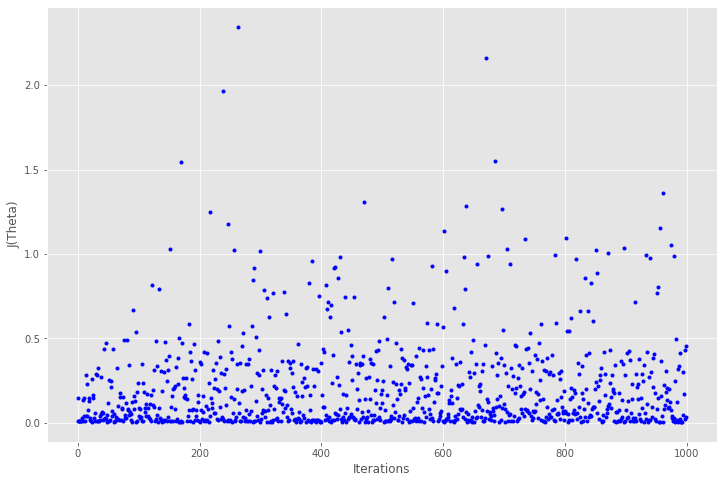

In [80]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

m#### Plot Theta_0 vs. loss

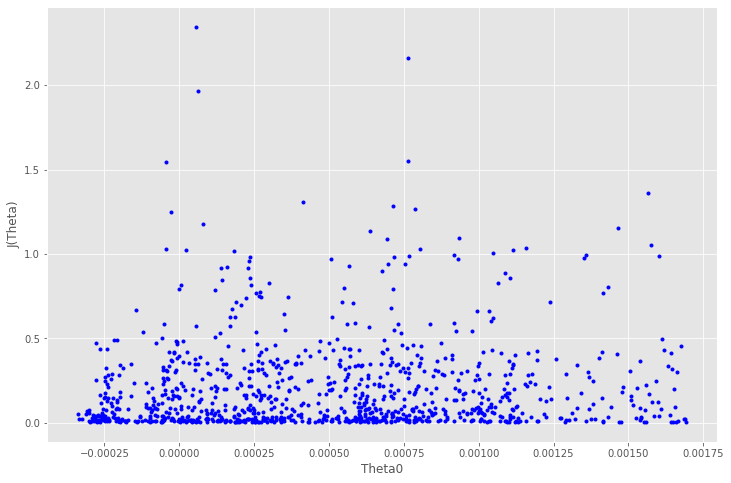

In [73]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta0')
_=ax.plot(theta0,cost_history,'b.')

#### Plot Theta_1 vs. loss

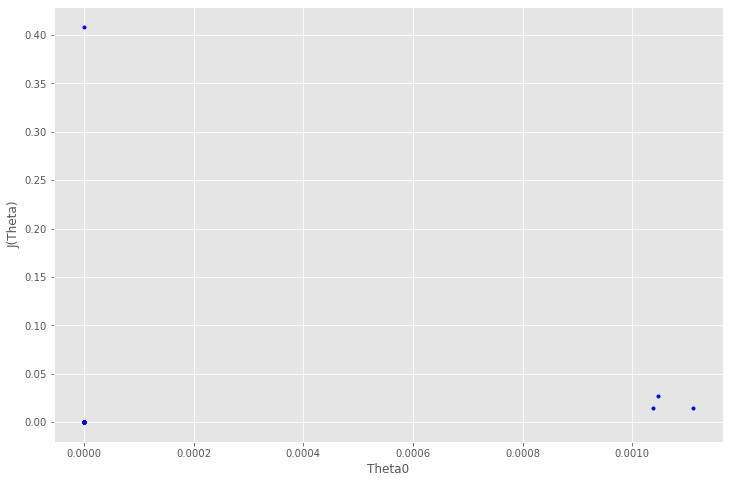

In [62]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta0')
_=ax.plot(theta1,cost_history,'b.')

#### Plot Theta_2 vs. loss

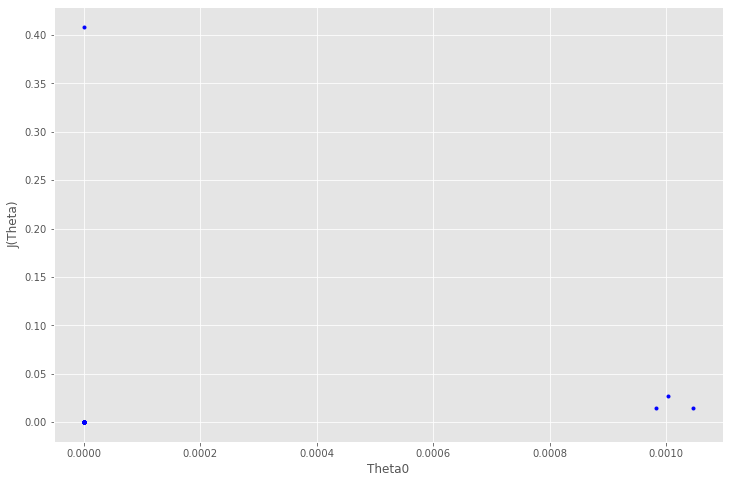

In [63]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta0')
_=ax.plot(theta2,cost_history,'b.')

#### Plot Theta_3 vs. loss

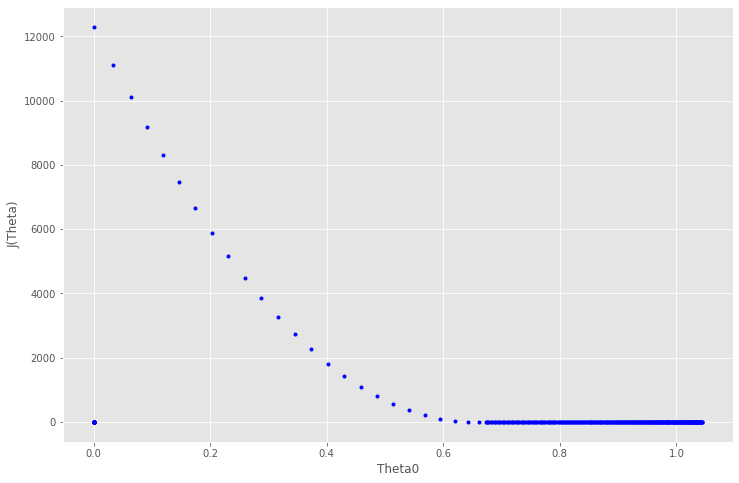

In [526]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta0')
_=ax.plot(theta3,cost_history,'b.')

### 2. Plot loss vs. Iterations

In [527]:
# number of batches
n_batches = math.ceil(m/batch_size) 

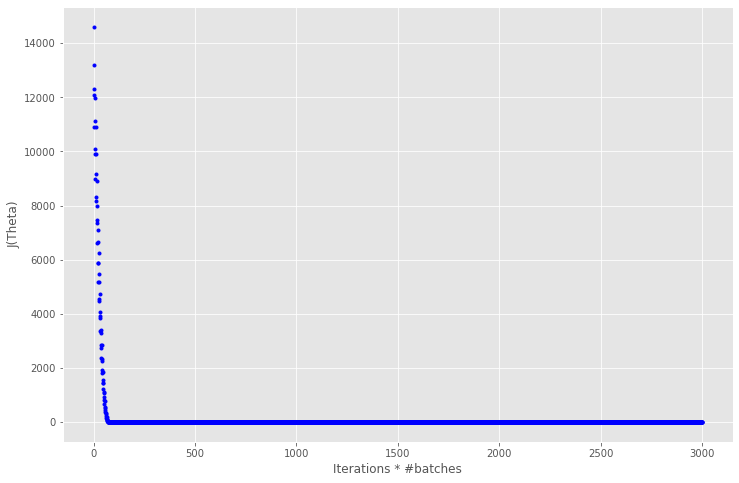

In [529]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations * #batches')
_=ax.plot(cost_history_by_batch,'b.')

#### Plot Theta_0 vs. loss

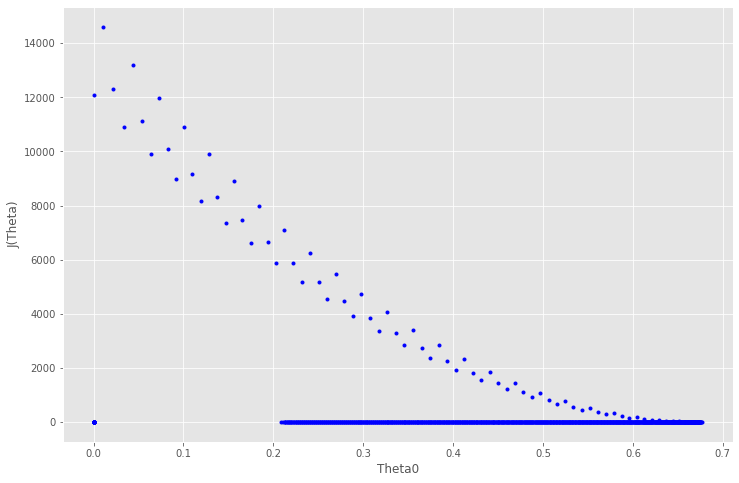

In [532]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta0')
_=ax.plot(theta0_by_batch,cost_history_by_batch,'b.')

#### Plot Theta_1 vs. loss

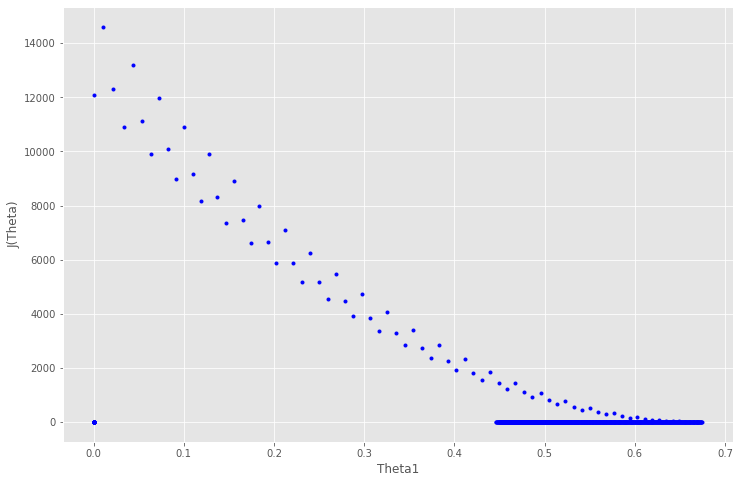

In [533]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta1')
_=ax.plot(theta1_by_batch,cost_history_by_batch,'b.')

#### Plot Theta_2 vs. loss

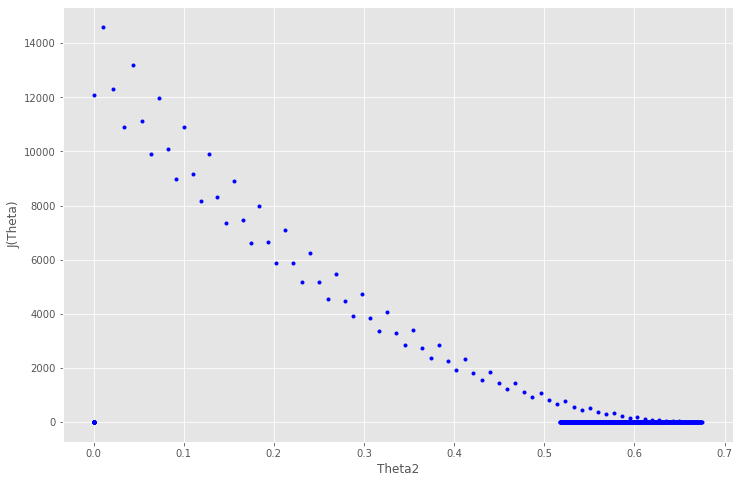

In [534]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta2')
_=ax.plot(theta2_by_batch,cost_history_by_batch,'b.')

#### Plot Theta_3 vs. loss

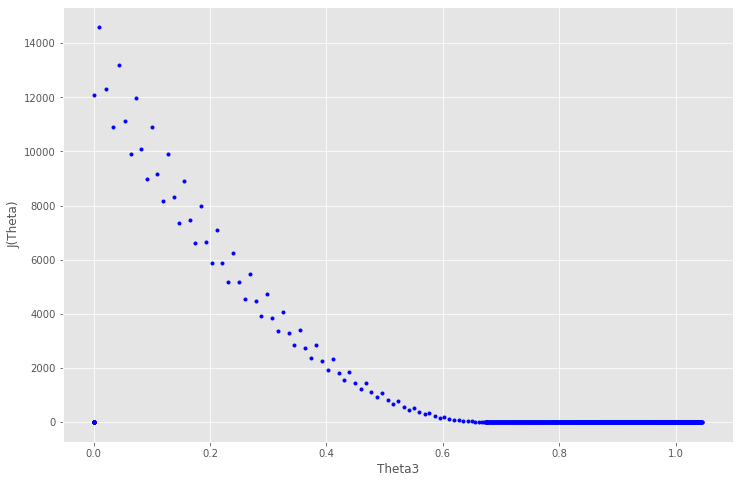

In [535]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta3')
_=ax.plot(theta3_by_batch,cost_history_by_batch,'b.')